In [1]:
import tensorflow as tf
import datetime, os

from matplotlib import pyplot as plt

from utils.image_transformation import random_jitter
from utils.mnist_loader import get_mnist_data_set
from utils.model_utils import u_net_generator, discriminator, plot_transformations, UNetLayerConfiguration, \
    DownsampleLayerConfiguration, LayerConfiguration


In [ ]:
# create directory for logs

logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)

In [2]:
# get samples of images with digits '9' and '6' in correct format
X_6, X_9 = get_mnist_data_set()

8192/4542 [======================================================] - 0s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


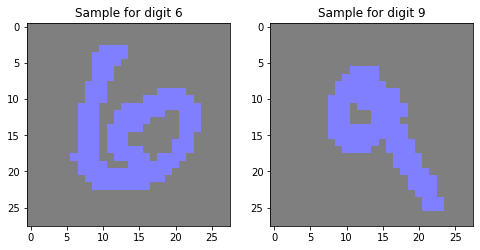

In [22]:
# show a sample per digit

plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Sample for digit 6')
plt.imshow(X_6[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Sample for digit 9')
plt.imshow(X_9[0] * 0.5 + 0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


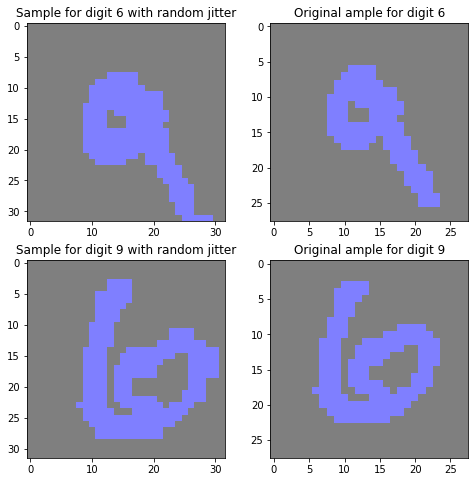

In [21]:
# show a sample per digit with applied random jitter

new_image_9, image_9 = random_jitter(X_9[0], target_size=(32, 32), mirror=False)
new_image_6, image_6 = random_jitter(X_6[0], target_size=(32, 32), mirror=False)

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.title('Sample for digit 6 with random jitter')
plt.imshow(new_image_9 * 0.5 + 0.5)

plt.subplot(222)
plt.title('Original sample for digit 6')
plt.imshow(image_9 * 0.5 + 0.5)

plt.subplot(223)
plt.title('Sample for digit 9 with random jitter')
plt.imshow(new_image_6 * 0.5 + 0.5)

plt.subplot(224)
plt.title('Original sample for digit 9')
plt.imshow(image_6 * 0.5 + 0.5)

In [73]:
# define architecture of networks

# how many output channels to have
output_channels = 3

# define generator architecture
u_net_encoder_decoder_layers = tuple([UNetLayerConfiguration(8, 3, apply_norm=False), UNetLayerConfiguration(16, 3),
                                      UNetLayerConfiguration(32, 3), UNetLayerConfiguration(64, 3)])
u_net_connecting_layers = tuple([DownsampleLayerConfiguration(64, 3)])

# define discriminator architecture
discriminator_downsampling_layers = tuple([DownsampleLayerConfiguration(8, 3, apply_norm=False), 
                                           DownsampleLayerConfiguration(16, 3), DownsampleLayerConfiguration(32, 3)])
discriminator_final_convolution_layer = LayerConfiguration(64, 3)

In [74]:
# initialize networks

# initialize generators
generator_g = u_net_generator(output_channels=output_channels, input_shape=(32, 32, 3), 
                              encoder_decoder_layers=u_net_encoder_decoder_layers, 
                              connecting_layers=u_net_connecting_layers, kernel_size_last_layer=3)
generator_f = u_net_generator(output_channels=output_channels, input_shape=(32, 32, 3), 
                              encoder_decoder_layers=u_net_encoder_decoder_layers, 
                              connecting_layers=u_net_connecting_layers, kernel_size_last_layer=3)

# initialize discriminators
discriminator_x = discriminator(input_shape=(32, 32, 3), downsampling_layers=discriminator_downsampling_layers,
                                final_convolution_layer=discriminator_final_convolution_layer, kernel_size_last_layer=3)
discriminator_y = discriminator(input_shape=(32, 32, 3), downsampling_layers=discriminator_downsampling_layers,
                                final_convolution_layer=discriminator_final_convolution_layer, kernel_size_last_layer=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


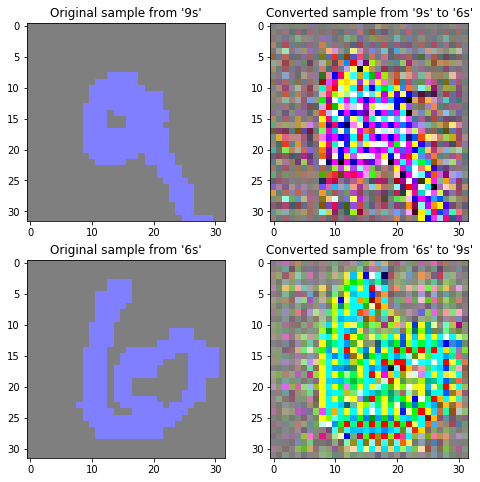

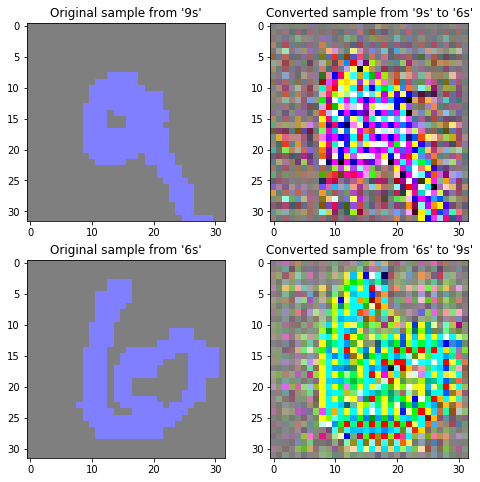

In [80]:
# plot transformations (before training)

plot_transformations(new_image_9, new_image_6, generator_f, generator_g, distributions_names=('9s', '6s'))


In [ ]:
# load the TensorBoard notebook extension
%load_ext tensorboard

# run TensorBoard
%tensorboard --logdir {logs_base_dir}
